# data586 Mini Project 1: Predicting Abalone Age

# Team Member: Jae Yoon Cho

## Dataset
- https://www.kaggle.com/rodolfomendes/abalone-dataset
- The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. 

### Labels:
- Sex:M, F, and I (infant)
- Length: Longest shell measurement
- Diameter: perpendicular to length
- Height: with meat in shell
- Whole weight: whole abalone
- Shucked weight: weight of meat
- Viscera weight: gut weight (after bleeding)
- Shell weight: after being dried
- Rings: +1.5 gives the age in years

## Main Goal
- The main purpose of this project is to predict the Abalone age

## Methodology

1. Import Libraries & Load the dataset
2. Exploratory Data Analysis
    - Sex column is excluded
3. Building a model
    - For this step, I will train the model with all of the data except sex 
    - y value is assigned with Ring column which indicates the Abalone age. 
    - Declaring Sequential(), I will build model step by step using model.add() to add Dense. 
    - Compile the model with loss = mean squared error.
4. Model Evaluation

### Import libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model, Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

### EDA

In [20]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [21]:
df.drop(['Sex'], axis=1, inplace=True)

In [22]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
import missingno as msno

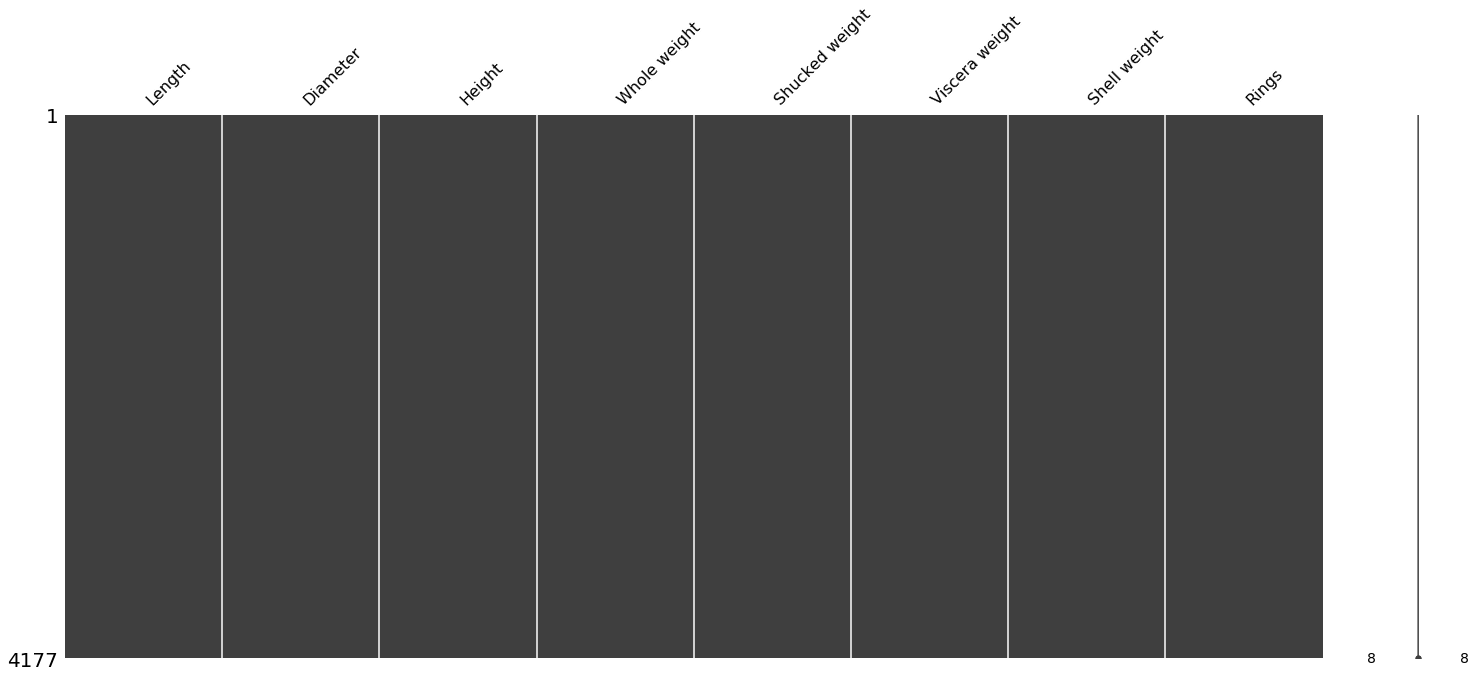

In [24]:
msno.matrix(df)

### Building a Model

In [25]:
x = df.iloc[:, 0:7].values
y = df.iloc[:, 7].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [26]:
model = Sequential()
model.add(Dense(30, input_dim=x.shape[1], activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1)) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
3341/3341 [==============================] - 0s 92us/step - loss: 51.1417
Epoch 2/100
3341/3341 [==============================] - 0s 69us/step - loss: 7.9195
Epoch 3/100
3341/3341 [==============================] - 0s 70us/step - loss: 7.2181
Epoch 4/100
3341/3341 [==============================] - 0s 67us/step - loss: 6.7549
Epoch 5/100
3341/3341 [==============================] - 0s 63us/step - loss: 6.5108
Epoch 6/100
3341/3341 [==============================] - 0s 60us/step - loss: 6.3285
Epoch 7/100
3341/3341 [==============================] - 0s 64us/step - loss: 6.1461
Epoch 8/100
3341/3341 [==============================] - 0s 62us/step - loss: 5.9439
Epoch 9/100
3341/3341 [==============================] - 0s 65us/step - loss: 5.7840
Epoch 10/100
3341/3341 [==============================] - 0s 66us/step - loss: 5.5623
Epoch 11/100
3341/3341 [==============================] - 0s 65us/step - loss: 5.3801
Epoch 12/100
3341/3341 [==============================] - 0s 5

3341/3341 [==============================] - 0s 65us/step - loss: 4.7798
Epoch 97/100
3341/3341 [==============================] - 0s 66us/step - loss: 4.7630
Epoch 98/100
3341/3341 [==============================] - 0s 67us/step - loss: 4.7801
Epoch 99/100
3341/3341 [==============================] - 0s 65us/step - loss: 4.7622
Epoch 100/100
3341/3341 [==============================] - 0s 66us/step - loss: 4.7917


### Model Evaluation

In [29]:
predict = model.predict(x_test).flatten()
for i in range(10):
    label = y_test[i]
    prediction= predict[i]
    print("Actual Abalone Age :{:.2f}, Predicted Abalone Age : {:.2f}".format(label, prediction))

Actual Abalone Age :11.00, Predicted Abalone Age : 10.56
Actual Abalone Age :12.00, Predicted Abalone Age : 11.25
Actual Abalone Age :10.00, Predicted Abalone Age : 11.22
Actual Abalone Age :9.00, Predicted Abalone Age : 11.37
Actual Abalone Age :9.00, Predicted Abalone Age : 10.28
Actual Abalone Age :8.00, Predicted Abalone Age : 9.35
Actual Abalone Age :8.00, Predicted Abalone Age : 8.96
Actual Abalone Age :13.00, Predicted Abalone Age : 12.77
Actual Abalone Age :9.00, Predicted Abalone Age : 10.70
Actual Abalone Age :11.00, Predicted Abalone Age : 8.27


### Conclusion
- It seem that the model accrately predicted the abalone age. 
- I built this model because it will help me to predict other numerical data in the future. (ex. house price, stock price)